IMPORT THE LIBRARIES

In [44]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

WRANGLE THE DATA

In [9]:
def wrangle(filepath):
    #import the file
    df = pd.read_csv(filepath)
    
    
    #create a binary target and remove 35% because the model was gonna be biased
    low,high = df["Stress Level"].quantile([0,0.64])
    mask_stress = df["Stress Level"].between(low,high)
    #apply the filter
    df = df[mask_stress]
    
    #drop null values
    df.dropna(inplace=True)
    
    #return the dataframe
    return df

In [10]:
df = wrangle(r"C:\Users\IFB19-039\Desktop\machine learning\stress detection\Stress-Lysis.csv")
df.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
4,10.87,79.87,87,0
5,11.31,80.31,40,0
6,18.16,87.16,88,1


print out summary statistics

In [21]:
df.describe()

,Humidity,Temperature,Step count,Stress Level
count,1291.000000,1291.000000,1291.000000,1291.000000
mean,16.450000,85.450000,64.471727,0.611929
std,3.728239,3.728239,37.798176,0.487500
min,10.000000,79.000000,0.000000,0.000000
25%,13.225000,82.225000,32.000000,0.000000
50%,16.450000,85.450000,64.000000,1.000000
75%,19.675000,88.675000,98.000000,1.000000
max,22.900000,91.900000,129.000000,1.000000


DATA VISUALIZATION

###Boxplots

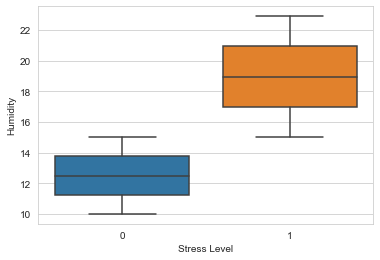

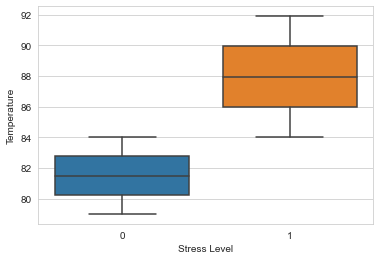

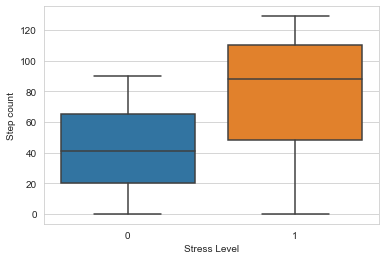

In [13]:
def plot_box(df, cols, col_x = 'Stress Level'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['Humidity', 'Temperature', 'Step count'
            ]
plot_box(df, num_cols)

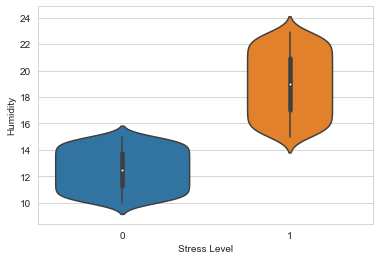

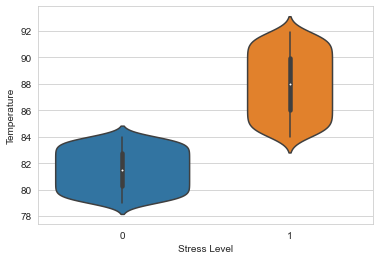

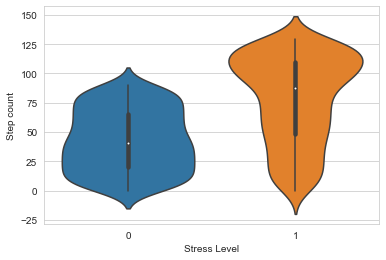

In [14]:
#VIOLIN PLOTS
def plot_violin(df, cols, col_x = 'Stress Level'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

plot_violin(df, num_cols)

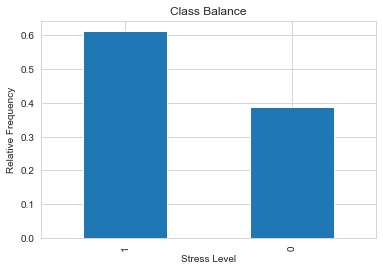

In [22]:
#class balance bar chart
df["Stress Level"].value_counts(normalize=True).plot(
    kind = "bar",
    title= "Class Balance"
    );
plt.ylabel("Relative Frequency")
plt.xlabel("Stress Level");

SPLIT

In [25]:
#randomly shuffle
target = "Stress Level"
X = df.drop(columns=target)
y = df[target]
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=42)

BASELINE

In [28]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:",round(acc_baseline,2))

Baseline Accuracy: 0.61


ITERATE

In [30]:
model = make_pipeline(
        LogisticRegression(max_iter=1000)
)
#fit the model
model.fit(X_train,y_train)

Pipeline(steps=[('logisticregression', LogisticRegression(max_iter=1000))])

EVALUATE

In [31]:
accuracy_score(y_train,model.predict(X_train))

0.999031007751938

In [32]:
model.score(X_test,y_test)

1.0

COMMUNICATE THE RESULTS

In [48]:
#predict probability
model.predict(X_train)[:5]

array([0, 1, 0, 0, 1], dtype=int64)

In [51]:
def make_prediction(Humidity,Temperature,Stepcount):
    
    #create a dictionary
    data = {
        "Humidity":Humidity,
        "Temperature":Temperature,
        "Step count":Stepcount,
     
    }
    #create a data frame from the dictionary
    df = pd.DataFrame(data,index=[0])
    prediction = model.predict(df).round(2)[0]
    return f"Stress Level: {prediction}"

In [52]:
make_prediction(21.33,90.33,123)

'Stress Level: 1'

In [55]:
interact(
    make_prediction,
    Humidity=IntSlider(
        min=X_train["Humidity"].min(),
        max=X_train["Humidity"].max(),
        value=X_train["Humidity"].mean(),
    ),
    Temperature=IntSlider(
        min=X_train["Temperature"].min(),
        max=X_train["Temperature"].max(),
        
        value=X_train["Temperature"].mean(),
    ),
    Stepcount=IntSlider(
        min=X_train["Step count"].min(),
        max=X_train["Step count"].max(),
        
        value=X_train["Step count"].mean(),
    ))

interactive(children=(IntSlider(value=16, description='Humidity', max=22, min=10), IntSlider(value=85, descrip…

<function __main__.make_prediction(Humidity, Temperature, Stepcount)>

In [57]:
df.head(10)

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
4,10.87,79.87,87,0
5,11.31,80.31,40,0
6,18.16,87.16,88,1
8,14.25,83.25,61,0
11,19.37,88.37,117,1
13,17.83,86.83,55,1
15,19.43,88.43,123,1
19,20.94,89.94,122,1
